<a href="https://colab.research.google.com/github/sMathujan/Analytics/blob/main/Feature_Engineering_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handling Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

#### 1 - Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.


#### 2 - Missing at Random MAR:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data.
Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

#### 3 - Missing data not at random (MNAR)
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

#### Examples

In [ ]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
## Check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
## Delete the rows or data point to handle missing values

df.shape

(891, 15)

In [ ]:
df.dropna().shape

(182, 15)

In [ ]:
## Column wise deletion

df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


<Axes: xlabel='age', ylabel='Count'>

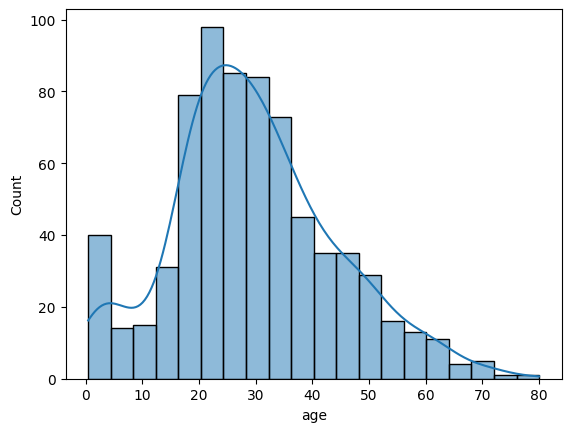

In [ ]:
## Imputation Missing Values
## 1 -  Mean Value Imputation
## Mean Imputation works well when we have normally distributed data

sns.histplot(df['age'], kde=True)

In [ ]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [ ]:
df[['Age_mean', 'age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [ ]:
## 2 - Median Value Imputation- If we have outliers in the dataset

df['Age_median'] = df['age'].fillna(df['age'].median())

In [ ]:
df[['Age_median', 'Age_mean', 'age']]

,Age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [ ]:
## 3 - Mode Imputation Technqiue - Categorical values

df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [ ]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [ ]:
df['Embarked_mode'] = df['embarked'].fillna(mode_value)

In [ ]:
df[['Embarked_mode', 'embarked']]

,Embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


## Handling Imbalanced Dataset

In [ ]:
import numpy as np
import pandas as pd
## Set the random seed for reproducibility
np.random.seed(123)

## Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [ ]:
n_class_0, n_class_1

(900, 100)

In [ ]:
## Create a dataframe with imbalanced dataset

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [ ]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [ ]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [ ]:
## Upsampling

df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [ ]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True, # Sample With replacement
                                 n_samples=len(df_majority),
                                 random_state=42
                                )

df_minority_upsampled.shape

(900, 3)

In [ ]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [ ]:
## Downsampling

df_majority_downsampled = resample(df_majority, replace=False, # Sample Without replacement
                                   n_samples=len(df_minority),
                                   random_state=42
                                  )

df_majority_downsampled.shape

(100, 3)

In [ ]:
df_majority_downsampled.head()

,feature_1,feature_2,target
70,0.468439,1.720920,0
827,1.089165,-0.464899,0
231,0.753869,-0.969798,0
588,0.588686,-0.704720,0
39,0.283627,1.012868,0


In [ ]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

## SMOTE (Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=1000, n_redundant=0, n_features=2,
                           n_clusters_per_class=1, weights=[0.90],
                           random_state=12)

In [ ]:
import pandas as pd

df1 = pd.DataFrame(X, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [ ]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

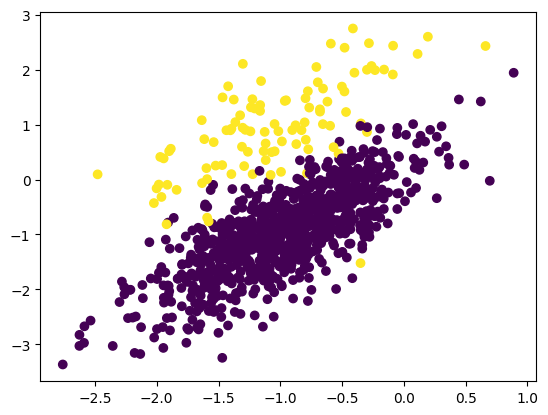

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [ ]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE

## Transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [ ]:
X.shape

(1800, 2)

In [ ]:
y.shape

(1800,)

In [ ]:
len(y[y==0])

900

In [ ]:
len(y[y==1])

900

In [ ]:
df1 = pd.DataFrame(X, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])
oversample_df = pd.concat([df1, df2], axis=1)

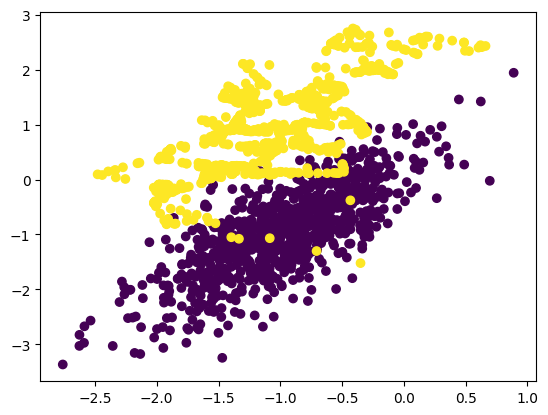

In [ ]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])

## Data Encoding

1. Nominal / OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding

#### Nominal / OHE Encoding
One hot encoding, also known as nominal encoding, is a technique used to represent categorical data as numerical data, which is more suitable for machine learning algorithms. In this technique, each category is represented as a binary vector where each bit corresponds to a unique category. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using one hot encoding as follows:

1. Red: [1, 0, 0]
2. Green: [0, 1, 0]
3. Blue: [0, 0, 1]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
## Create a simple dataframe

df = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'green', 'red', 'blue']
})

In [ ]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [ ]:
## Create an instance of Onehotencoder
encoder = OneHotEncoder()

In [ ]:
## Perform fit and transform
encoded = encoder.fit_transform(df[['color']]).toarray()

In [ ]:
import pandas as pd
encoder_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [ ]:
## For new data
encoder.transform([['blue']]).toarray()

f:\Master Data Analysis\3 - Complete Python with Important Libraries\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [ ]:
pd.concat([df, encoder_df], axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


#### Label Encoding
Label encoding and ordinal encoding are two techniques used to encode categorical data as numerical data.

Label encoding involves assigning a unique numerical label to each category in the variable. The labels are usually assigned in alphabetical order or based on the frequency of the categories. For example, if we have a categorical variable "color" with three possible values (red, green, blue), we can represent it using label encoding as follows:

1. Red: 1
2. Green: 2
3. Blue: 3

In [ ]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()

In [ ]:
lbl_encoder.fit_transform(df[['color']])

f:\Master Data Analysis\3 - Complete Python with Important Libraries\venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [ ]:
lbl_encoder.transform([['red']])

f:\Master Data Analysis\3 - Complete Python with Important Libraries\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [ ]:
lbl_encoder.transform([['blue']])

f:\Master Data Analysis\3 - Complete Python with Important Libraries\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

In [ ]:
lbl_encoder.transform([['green']])

f:\Master Data Analysis\3 - Complete Python with Important Libraries\venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])

#### Ordinal Encoding
It is used to encode categorical data that have an intrinsic order or ranking. In this technique, each category is assigned a numerical value based on its position in the order. For example, if we have a categorical variable "education level" with four possible values (high school, college, graduate, post-graduate), we can represent it using ordinal encoding as follows:

1. High school: 1
2. College: 2
3. Graduate: 3
4. Post-graduate: 4

In [ ]:
## Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
## Create a sample dataframe with an ordinal variable
df = pd.DataFrame({
    'size': ['small', 'medium', 'large', 'medium', 'small', 'large']
})

In [ ]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [ ]:
## Create an instance of OrdinalEncoder and then fit_transform
encoder = OrdinalEncoder(categories=[['small', 'medium', 'large']])

In [ ]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [ ]:
encoder.transform([['small']])

f:\Master Data Analysis\3 - Complete Python with Important Libraries\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

### Target Guided Ordinal Encoding
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [ ]:
import pandas as pd

## Create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [ ]:
mean_price = df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [ ]:
df['city_encoded'] = df['city'].map(mean_price)

In [ ]:
df[['price', 'city_encoded']]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0
